# **Data Loading**

In [69]:
import kagglehub

path = kagglehub.dataset_download("mantri7/imdb-movie-reviews-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-movie-reviews-dataset


In [70]:
import pandas as pd
df = pd.read_csv(f"{path}/train_data (1).csv")
print(df.head())

                                                   0  1
0  This film is absolutely awful, but nevertheles...  0
1  Well since seeing part's 1 through 3 I can hon...  0
2  I got to see this film at a preview and was da...  1
3  This adaptation positively butchers a classic ...  0
4  Råzone is an awful movie! It is so simple. It ...  0


# **Data Preprocessing**

In [71]:
df.columns = ['review', 'label']
df.head()

,review,label
0,"This film is absolutely awful, but nevertheles...",0
1,Well since seeing part's 1 through 3 I can hon...,0
2,I got to see this film at a preview and was da...,1
3,This adaptation positively butchers a classic ...,0
4,Råzone is an awful movie! It is so simple. It ...,0


In [72]:
print(df['label'].value_counts())


label
0    12500
1    12500
Name: count, dtype: int64


In [73]:
# df_test = pd.read_csv("/kaggle/input/imdb-movie-reviews-dataset/test_data (1).csv")
# df_test.columns = ['review', 'label']
# df_test.head()

In [74]:
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [76]:
def preprocess_text(text):
    text = re.sub(r'<.*?>', ' ', text)
    text = ''.join(char for char in text if char not in string.punctuation and not char.isdigit())
    tokens = nltk.word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in string.punctuation]
    return " ".join(tokens)
df['processed_review'] = df['review'].apply(preprocess_text)

# **Data Splitting**

In [90]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df['processed_review'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])


tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# df.to_csv("processed_imdb_reviews.csv", index=False)
# from google.colab import files
# files.download("processed_imdb_reviews.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Model Training and Evaluation**

In [78]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [79]:
y_pred_LR = model.predict(X_test_tfidf)

In [80]:
print(f"Accuracy:  {accuracy_score(y_test, y_pred_LR):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_LR):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_LR):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_LR):.4f}")

Accuracy:  0.8830
Precision: 0.8832
Recall:    0.8828
F1-Score:  0.8830


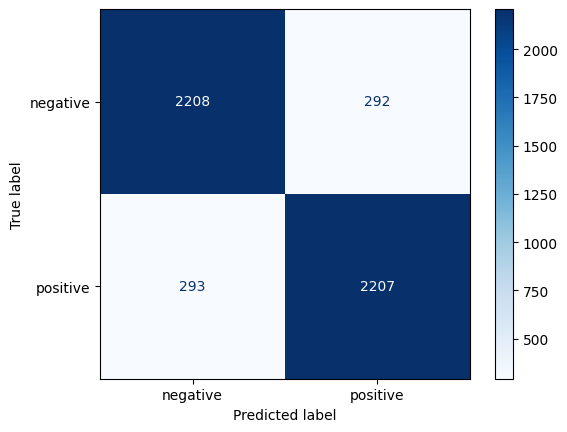

In [81]:
cm = confusion_matrix(y_test, y_pred_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [82]:
from sklearn.naive_bayes import MultinomialNB
model_MB = MultinomialNB()
model_MB.fit(X_train_tfidf, y_train)
y_pred_MB = model_MB.predict(X_test_tfidf)

In [83]:
print(f"Accuracy:  {accuracy_score(y_test, y_pred_MB):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_MB):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_MB):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_MB):.4f}")

Accuracy:  0.8538
Precision: 0.8609
Recall:    0.8440
F1-Score:  0.8524


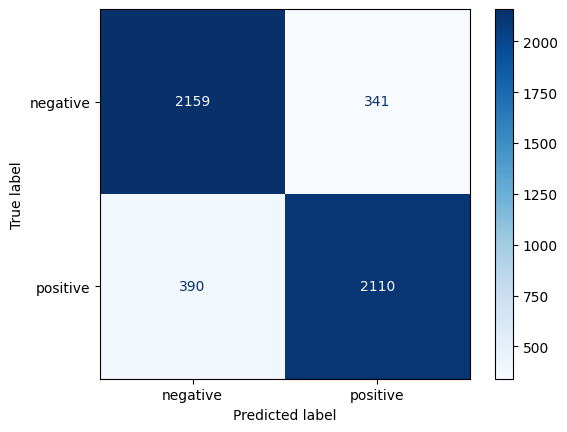

In [84]:
cm = confusion_matrix(y_test, y_pred_MB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# **Deep Learning Model**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 188s 741ms/step - accuracy: 0.5008 - loss: 0.6937 - val_accuracy: 0.5055 - val_loss: 0.6931
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 186s 678ms/step - accuracy: 0.5736 - loss: 0.6548 - val_accuracy: 0.8553 - val_loss: 0.3392
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 203s 683ms/step - accuracy: 0.8992 - loss: 0.2593 - val_accuracy: 0.8717 - val_loss: 0.3111
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 201s 680ms/step - accuracy: 0.9642 - loss: 0.1137 - val_accuracy: 0.8572 - val_loss: 0.4450
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 200s 671ms/step - accuracy: 0.9917 - loss: 0.0332 - val_accuracy: 0.8608 - val_loss: 0.6146


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.8577 - loss: 0.6724
Test Accuracy: 0.8602


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step
              precision    recall  f1-score   support

    Negative       0.89      0.82      0.85      2500
    Positive       0.83      0.90      0.87      2500

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



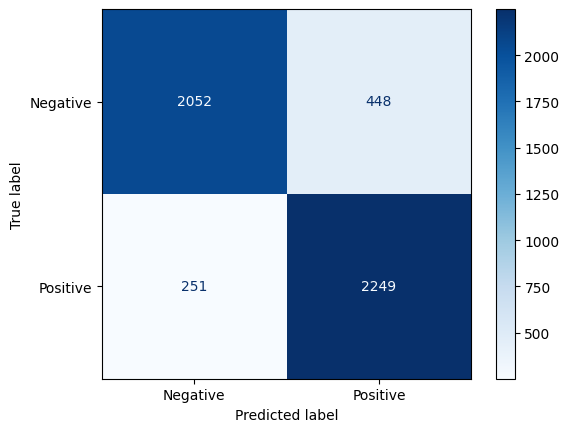

In [88]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import classification_report
import joblib

max_vocab_size = 30000
max_seq_len = 300

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_len, padding='post')

model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=128, input_length=max_seq_len),
    Conv1D(filters=128, kernel_size=8, activation='relu'),
    Conv1D(filters=64, kernel_size=6, activation='relu'),
    MaxPooling1D(),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

model.save("review_classifier_cnn.h5")
joblib.dump(tokenizer, "tokenizer.pkl")

In [ ]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


y_pred_probs = model.predict(X_test_pad)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [91]:
# from google.colab import files

# files.download("review_classifier_cnn.h5")
# files.download("tokenizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Demo**

In [89]:
#@title Demo
import joblib
model = tf.keras.models.load_model('review_classifier_cnn.h5')
tokenizer = joblib.load('tokenizer.pkl')
max_seq_len = 300


def preprocess_input(text):
    import re, string, nltk
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    nltk.download('punkt')

    stop_words = set(stopwords.words('english'))
    text = re.sub(r'<.*?>', ' ', text)
    text = ''.join(ch for ch in text if ch not in string.punctuation and not ch.isdigit())
    tokens = nltk.word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)


while True:
    user_input = input("Enter a review (or 'quit' to exit): ")
    if user_input.lower() == 'quit':
        break

    clean_text = preprocess_input(user_input)
    seq = tokenizer.texts_to_sequences([clean_text])
    padded_seq = pad_sequences(seq, maxlen=max_seq_len, padding='post')


    prob = model.predict(padded_seq)[0][0]
    sentiment = "Positive" if prob > 0.5 else "Negative"

    print(f"Predicted Sentiment: {sentiment} ({prob:.2f} confidence)")


Enter a review (or 'quit' to exit): Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Predicted Sentiment: Positive (1.00 confidence)
Enter a review (or 'quit' to exit): I see that C. Thomas Howell has appeared in many movies since his heyday in the 80s as an accomplished young actor.<br /><br />I bought this DVD because it was cheap and in part for the internet-related plot and to see how much older C. Thomas Howell is; I do not recall seeing him in any movies since the 1980s.<br /><br />In just a few words: what a very big disappointment. I give some low budget movies a chance, but this one started out lame. Within the first 15 minutes of the movie, this elusive woman is chatting with an Asian guy in a chatroom. They basically stimulate themselves to their own chat, she then insists on meeting the participant in person. She meets him, has sex, ties him up and then murders him in cold blood. The plot then deteriorates further.<br /><br />The plot is thin and flimsy and the acting is very stiff. Do not bother renting it much less p

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Predicted Sentiment: Negative (0.03 confidence)
Enter a review (or 'quit' to exit): I did not enjoy the film Eraser whatsoever. It's awful acting, boring storyline and average special
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Predicted Sentiment: Negative (0.01 confidence)
Enter a review (or 'quit' to exit): quit
